In [1]:
import sys
import os

sys.path.append(os.path.abspath("../Classifiers"))

from RF_hahaha import * 

In [2]:
import warnings
warnings.filterwarnings( 'ignore' )
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Paths to top30 from GTD data

In [3]:
trains = ['train100', 'train200', 'train300', 'train478']
tests = ['test100', 'test200', 'test300', 'test478', ]
traindir = '../../../../data/top30groups/traindata'
testdir = '../../../../data/top30groups/testdata'

trainpaths = []
testpaths = []
for i, partition in enumerate(trains):
    trainpaths.append(f'{traindir}/{partition}.csv')
    testpaths.append(f'{testdir}/{tests[i]}.csv')

### Training models and computing accuracy

In [4]:
models = []
accuracies = []
predictions = []
truths = []
n = [100, 200, 300, 478]
for i, path in enumerate(trainpaths):
    print(f'Computing for partition {i+1}, balanced classes with {n[i]} entries for each class and one hot encoded geodata')

    # run classifier on data
    rfc, accuracy, y_pred_rfc, labels = main(trainpaths[i], testpaths[i])

    #  saving models, accuracies, predictions, and truths in case we need it for statistics later
    models.append(rfc)
    accuracies.append(accuracy)
    predictions.append(y_pred_rfc)
    truths.append(labels)

    print("---------------------------------------------------")

Computing for partition 1, balanced classes with 100 entries for each class and one hot encoded geodata
(2100, 1803)
(900, 1803)
Finding optimal hyperparameters...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training best RF classifier...
Making predictions...
Accuracy: 44.00%
---------------------------------------------------
Computing for partition 2, balanced classes with 200 entries for each class and one hot encoded geodata
(4200, 3173)
(1800, 3173)
Finding optimal hyperparameters...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training best RF classifier...
Making predictions...
Accuracy: 47.83%
---------------------------------------------------
Computing for partition 3, balanced classes with 300 entries for each class and one hot encoded geodata
(6300, 4392)
(2700, 4392)
Finding optimal hyperparameters...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Training best RF classifier...
Making predictions...
Accuracy: 48.63%
---------

In [5]:
for i in range(len(models)):
    print(classification_report(predictions[i], truths[i]))

                                                  precision    recall  f1-score   support

                          Abu Sayyaf Group (ASG)       0.47      0.34      0.39        41
        African National Congress (South Africa)       0.70      0.26      0.38        80
                                Al-Qaida in Iraq       0.70      0.58      0.64        36
        Al-Qaida in the Arabian Peninsula (AQAP)       0.30      0.64      0.41        14
                                      Al-Shabaab       0.40      0.92      0.56        13
             Basque Fatherland and Freedom (ETA)       0.40      0.92      0.56        13
                                      Boko Haram       0.13      0.80      0.23         5
  Communist Party of India - Maoist (CPI-Maoist)       0.17      0.33      0.22        15
       Corsican National Liberation Front (FLNC)       0.93      0.33      0.49        85
                       Donetsk People's Republic       0.57      0.68      0.62        25
Farabundo

In [6]:
with open("Results/rf_top30_OneHotLongLatCombined.txt", "w") as f:
    for i in range(len(trainpaths)):
        f.write(f"Partition {i+1} - {n[i]} samples per class, without geograpgical data except long/lat which are one hot encoded\n")
        f.write(f"Accuracy: {accuracies[i]*100:.2f}%\n")
        f.write("---------------------------------------------------\n")

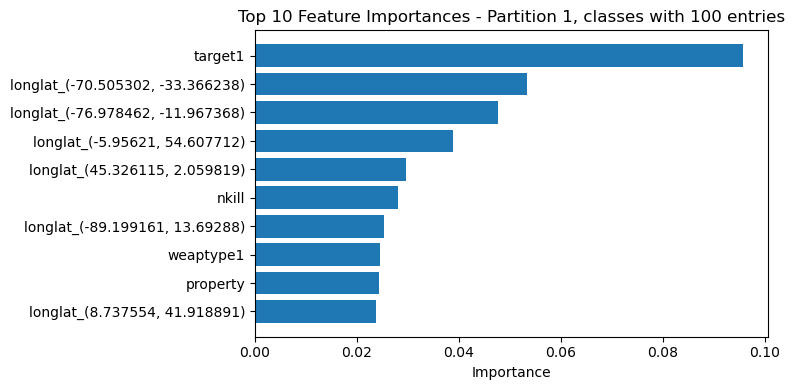

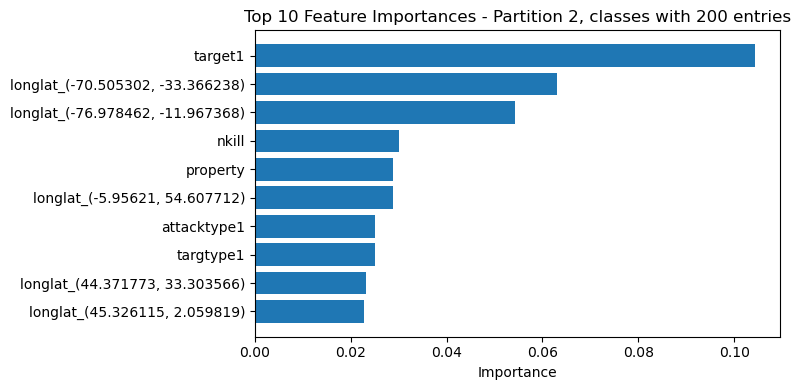

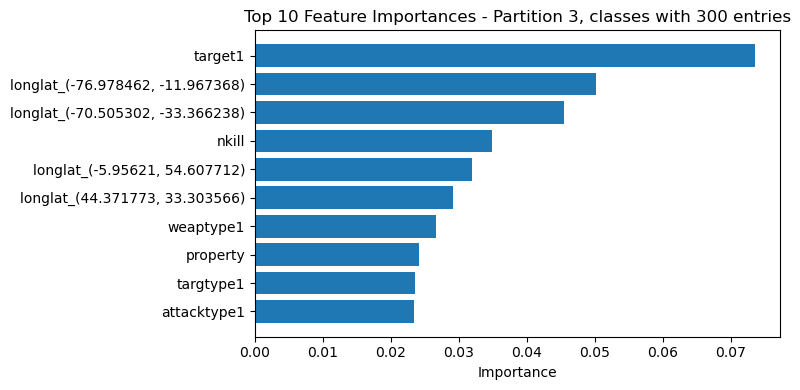

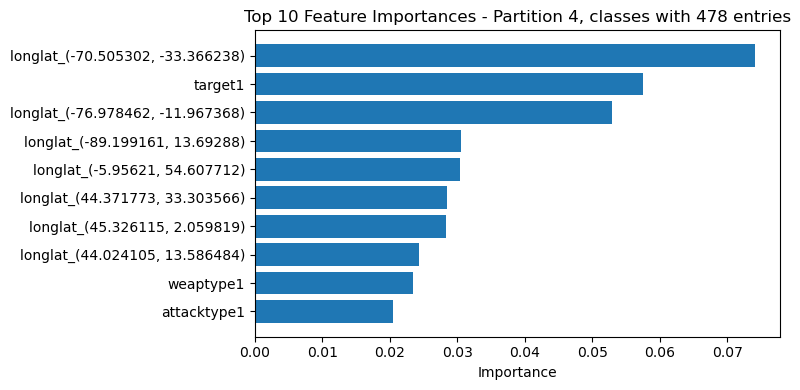

In [7]:
top_k = 10

for i, rfc in enumerate(models):
    importances = rfc.feature_importances_

    feature_names = rfc.feature_names_in_

    indices = np.argsort(importances)[::-1][:top_k]
    top_features = [feature_names[j] for j in indices]
    top_importances = importances[indices]

    plt.figure(figsize=(8, 4))
    plt.barh(top_features[::-1], top_importances[::-1])
    plt.xlabel("Importance")
    plt.title(f"Top {top_k} Feature Importances - Partition {i+1}, classes with {n[i]} entries")
    plt.tight_layout()
    plt.show()